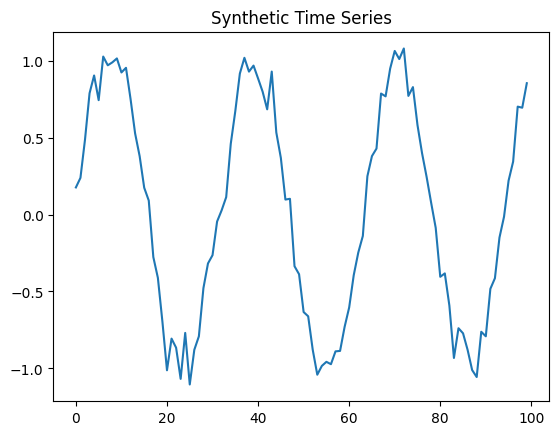

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


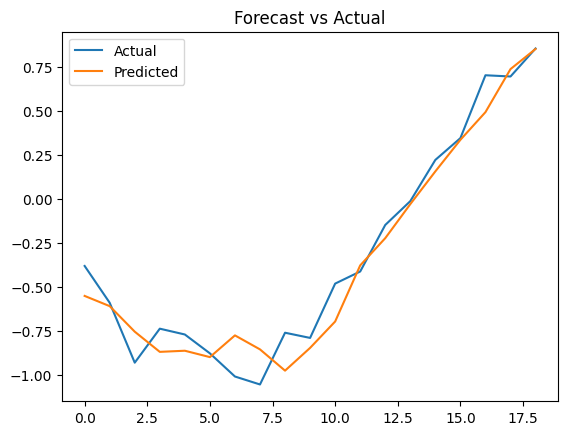

Test RMSE: 0.1327


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error


np.random.seed(0)
time = np.arange(100)
data = np.sin(0.2 * time) + np.random.normal(0, 0.1, size=len(time))


plt.plot(time, data)
plt.title("Synthetic Time Series")
plt.show()


def create_dataset(series, window_size=5):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i + window_size])
        y.append(series[i + window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_dataset(data, window_size)


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

split = int(len(X) * 0.8)
X_train, X_test = X_scaled[:split], X_scaled[split:]
y_train, y_test = y_scaled[:split], y_scaled[split:]


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(window_size,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_split=0.1)


y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)


plt.plot(range(len(y_test_inv)), y_test_inv, label='Actual')
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.legend()
plt.title("Forecast vs Actual")
plt.show()


rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred))
print(f"Test RMSE: {rmse:.4f}")
